<a href="https://colab.research.google.com/github/Medetkhan/Neural-Networks-Project-Medet/blob/main/Project3_Neural_Networks_Medet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from tensorflow.keras.preprocessing.image import load_img

In [5]:
#Создание своих слоев CNN

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [7]:
model = models.Sequential()

In [8]:
model.add(layers.InputLayer(input_shape=(150,150,3)))

In [9]:
model.add(layers.Conv2D(32, kernel_size=(3,3)))

In [10]:
model.add(layers.MaxPooling2D(pool_size=(2,2)))

In [11]:
#model.add(layers.Dense(50, activation = 'relu'))


In [12]:
model.add(layers.Flatten())

In [13]:
model.add(layers.Dense(64, activation='relu'))

In [14]:
model.add(layers.Dense(1, activation = 'sigmoid'))

In [15]:
from keras.src.optimizers import SGD
loss = keras.losses.BinaryCrossentropy(from_logits=False)
model.compile(optimizer=SGD(learning_rate = 0.002, momentum=0.8), loss=loss, metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [17]:
#загрузим данные для тренинга и теста

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_gen = ImageDataGenerator(rescale=1./255) #preprocessing_function=preprocess_input

train_ds = train_gen.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon-dataset/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1594 images belonging to 2 classes.


In [20]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

In [21]:
val_gen = ImageDataGenerator(rescale=1./255)

val_ds = val_gen.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon-dataset/test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 394 images belonging to 2 classes.


In [22]:
val_ds.class_indices

{'dino': 0, 'dragon': 1}

In [23]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
80/80 [==============================] - 384s 5s/step - loss: 0.6490 - accuracy: 0.6217 - val_loss: 0.5676 - val_accuracy: 0.7284
Epoch 2/10
80/80 [==============================] - 8s 101ms/step - loss: 0.5418 - accuracy: 0.7240 - val_loss: 0.4862 - val_accuracy: 0.7766
Epoch 3/10
80/80 [==============================] - 8s 105ms/step - loss: 0.4374 - accuracy: 0.8068 - val_loss: 0.4631 - val_accuracy: 0.7817
Epoch 4/10
80/80 [==============================] - 7s 89ms/step - loss: 0.3997 - accuracy: 0.8262 - val_loss: 0.4284 - val_accuracy: 0.8122
Epoch 5/10
80/80 [==============================] - 8s 101ms/step - loss: 0.3480 - accuracy: 0.8469 - val_loss: 0.3882 - val_accuracy: 0.8249
Epoch 6/10
80/80 [==============================] - 7s 91ms/step - loss: 0.3385 - accuracy: 0.8639 - val_loss: 0.3791 - val_accuracy: 0.8503
Epoch 7/10
80/80 [==============================] - 8s 99ms/step - loss: 0.2886 - accuracy: 0.8908 - val_loss: 0.3650 - val_accuracy: 0.8350
Epoch 8/10

In [24]:
# from keras.callbacks import Callback

# class AccuracyHistory(Callback):
#   def on_train_begin(self, logs={}):
#     self.accuracies = []

#   def on_epoch_end(self, epoch, logs={}):
#     self.accuracies.append(logs.get('accuracy'))

In [25]:
score = model.accuracy_score()

AttributeError: ignored

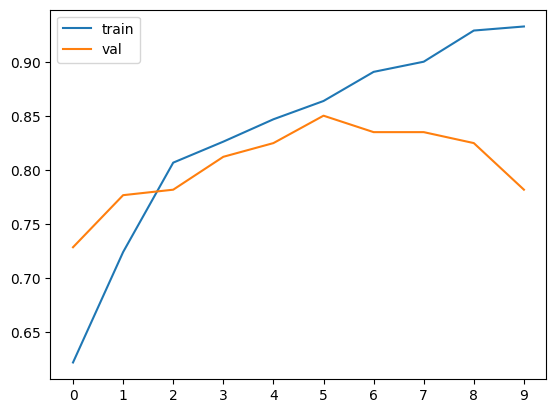

In [26]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [27]:
#epoch_accuracies = accuracy_history.accuracies

In [28]:
#Какова медиана точности обучения по всем эпохам?
train_accuracy = history.history['accuracy']

In [29]:
val_accuracy = history.history['val_accuracy']

In [30]:
train_median = np.median(train_accuracy)

In [31]:
val_median = np.median(val_accuracy)

In [32]:
train_median

0.8553952276706696

In [33]:
val_median

0.8185279071331024

In [34]:
#Каково стандартное отклонение потерь в процессе обучения по всем эпохам?
train_std = np.std(train_accuracy)

In [35]:
train_std

0.09245430598412328

In [36]:
train_losses = history.history['loss']

In [37]:
val_std=np.std(train_losses)

In [38]:
val_std

0.13538839415107812

In [39]:
#аугментация данных
from PIL import Image

In [40]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [41]:
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon-dataset/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'  # Set to 'categorical' if you have multiple classes
)

Found 1594 images belonging to 2 classes.


In [42]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [43]:
validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/dino-dragon-dataset/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 394 images belonging to 2 classes.


In [ ]:
# checkpoint = keras.callbacks.ModelCheckpoint(
#     'own_model_{epoch:02d}_{val_accuracy:.3f}.h5',
#     save_best_only=True,
#     monitor='val_accuracy',
#     mode='max'
# )

In [44]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
80/80 [==============================] - 18s 219ms/step - loss: 0.5362 - accuracy: 0.7403 - val_loss: 0.4164 - val_accuracy: 0.8147
Epoch 2/10
80/80 [==============================] - 17s 218ms/step - loss: 0.5210 - accuracy: 0.7465 - val_loss: 0.3736 - val_accuracy: 0.8299
Epoch 3/10
80/80 [==============================] - 16s 202ms/step - loss: 0.4813 - accuracy: 0.7698 - val_loss: 0.4476 - val_accuracy: 0.8096
Epoch 4/10
80/80 [==============================] - 16s 203ms/step - loss: 0.4591 - accuracy: 0.7836 - val_loss: 0.4247 - val_accuracy: 0.8096
Epoch 5/10
80/80 [==============================] - 16s 201ms/step - loss: 0.4648 - accuracy: 0.7829 - val_loss: 0.4450 - val_accuracy: 0.8046
Epoch 6/10
80/80 [==============================] - 16s 199ms/step - loss: 0.4688 - accuracy: 0.7729 - val_loss: 0.4133 - val_accuracy: 0.8198
Epoch 7/10
80/80 [==============================] - 17s 209ms/step - loss: 0.4613 - accuracy: 0.7880 - val_loss: 0.3555 - val_accuracy: 0.8299

In [45]:
train_losses_augment = history.history['loss']
train_losses_augment

[0.5362452268600464,
 0.5210400223731995,
 0.48126837611198425,
 0.4591176211833954,
 0.46483922004699707,
 0.468802273273468,
 0.4612833261489868,
 0.4501909911632538,
 0.457202672958374,
 0.44231635332107544]

In [46]:
average_loss_augment = np.mean(train_losses_augment)
average_loss_augment

0.47423060834407804

In [47]:
train_accur_augment = history.history['accuracy']

In [49]:
average_accur_augment = np.mean(train_accur_augment[6:])
average_accur_augment

0.7906210720539093